In [6]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())


# The watershed transform
## Principes

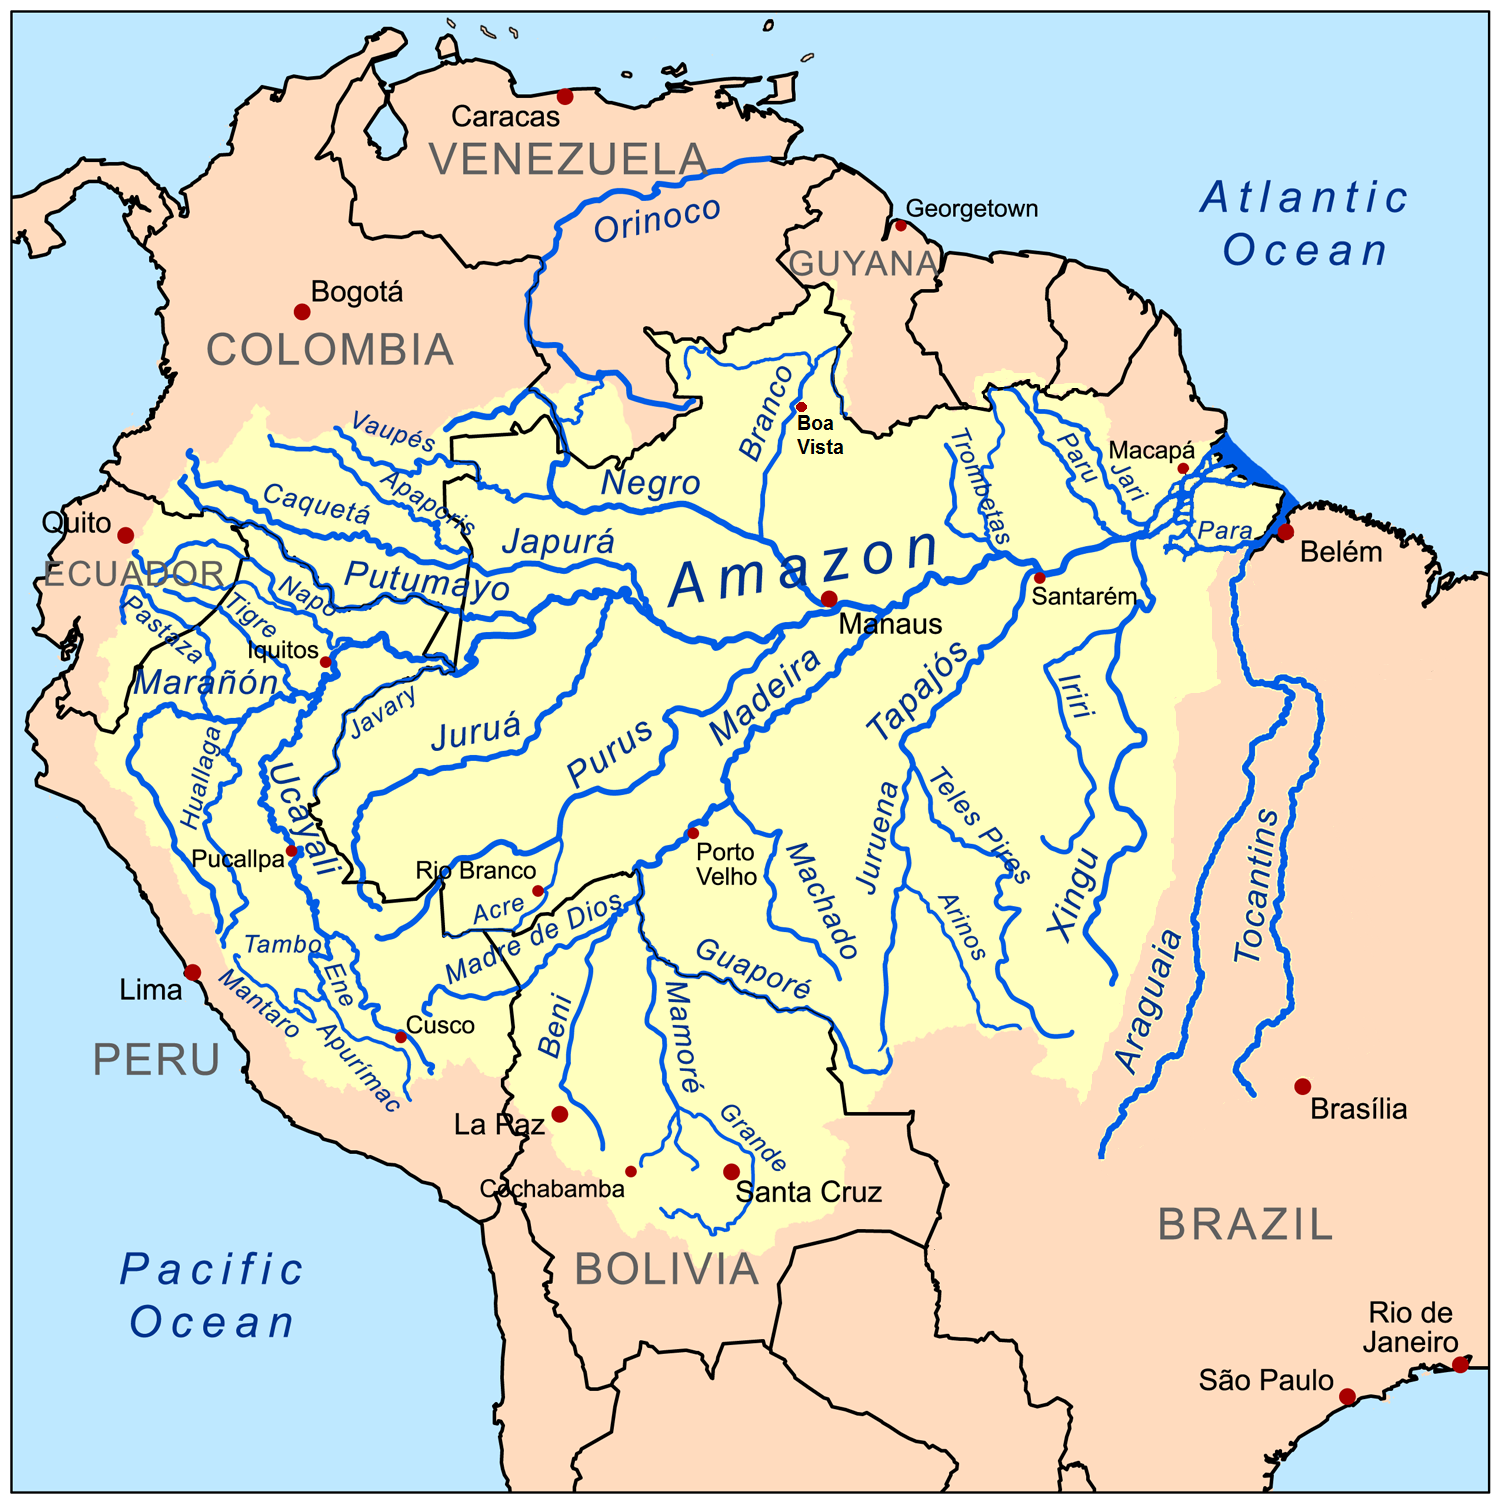

In [7]:
Image('https://upload.wikimedia.org/wikipedia/commons/0/02/Amazonriverbasin_basemap.png')

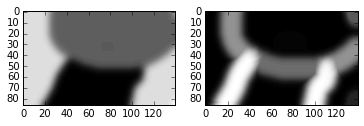

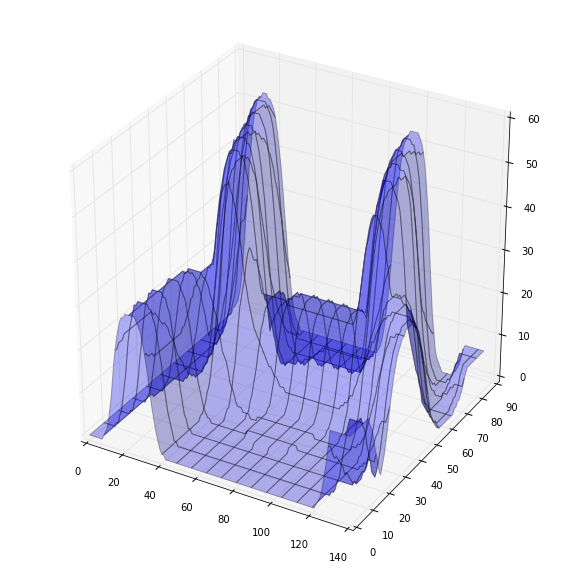

In [8]:
from skimage.data import imread
import numpy as np
from skimage.morphology import disk
import skimage.filter.rank as skr
from skimage.measure import label
from skimage.morphology import watershed,disk
import skimage.filter.rank as skr
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from mpl_toolkits.mplot3d import axes3d, Axes3D

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/ws2.png')[:,:,0]
gradient = skr.gradient(ima,disk(10))

plt.subplot(1,2,1)
plt.imshow(ima,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(gradient,cmap=plt.cm.gray)

m,n = gradient.shape


fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(range(n),range(m))
Z = gradient

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3);


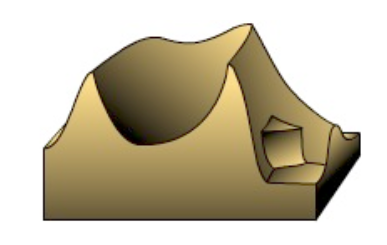

In [9]:
Image('http://homepages.ulb.ac.be/~odebeir/data/watershed2.png')

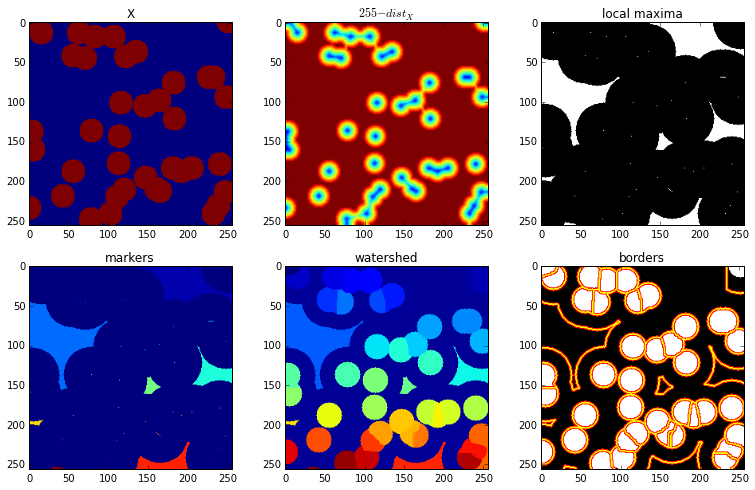

In [10]:
import numpy as np
from skimage.morphology import disk
import skimage.filter.rank as skr
from skimage.measure import label
from skimage.morphology import watershed
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

np.random.seed(1)
n = np.random.random((256,256))<.0005
d = skr.maximum(n,disk(15))

distance = ndi.distance_transform_edt(d).astype(np.uint8)
local_max = distance == skr.maximum(distance,disk(20))
marks = label(local_max,background=0)

ws = watershed(255-distance,marks+1)

result = mark_boundaries(d,ws,outline_color=[1,0,0])

plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(d)
plt.title('X')
plt.subplot(2,3,2)
plt.imshow(255-distance)
plt.title('$255-dist_X$')
plt.subplot(2,3,3)
plt.imshow(local_max,cmap=plt.cm.gray)
plt.title('local maxima')
plt.subplot(2,3,4)
plt.imshow(marks)
plt.title('markers')
plt.subplot(2,3,5)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(2,3,6)
plt.imshow(result)
plt.title('borders');


example of a segmentation for low contrast objects

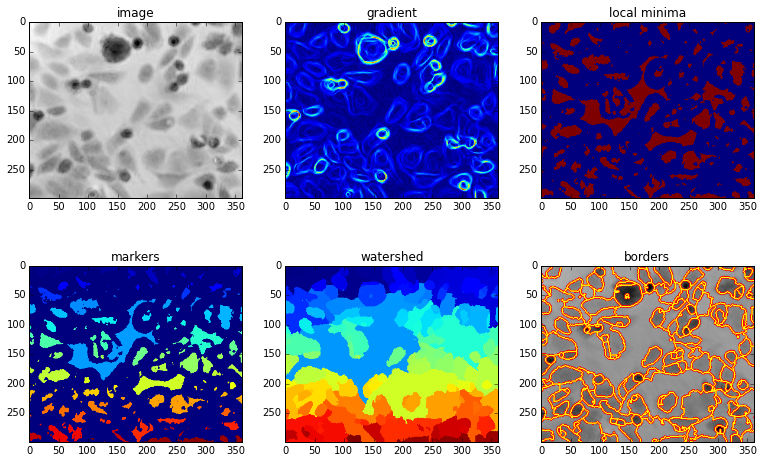

In [31]:
import numpy as np
from scipy import ndimage

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/cells.tif')

#filtered version
lp = skr.median(ima,disk(5))
grad = skr.gradient(lp,disk(1))
mark = skr.minimum(ima,disk(10))+10 >= ima

lab = label(mark,background=0)+1
ws = watershed(grad,lab)

result = mark_boundaries(ima,ws,outline_color=[1,0,0])

plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(ima,cmap=plt.cm.gray)
plt.title('image')
plt.subplot(2,3,2)
plt.imshow(grad)
plt.title('gradient')
plt.subplot(2,3,3)
plt.imshow(mark)
plt.title('local minima')
plt.subplot(2,3,4)
plt.imshow(lab)
plt.title('markers')
plt.subplot(2,3,5)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(2,3,6)
plt.imshow(result)
plt.title('borders');


>see also:
* The watershed transform [MMIP](../00-Preface/06-References.ipynb#[DIPM]) pp443-481
